# Evaluation metrics

## 1. Introduction

In data science, evaluation metrics are used to measure the performance and effectiveness of various machine learning models and algorithms. The choice of evaluation metrics depends on the specific problem being solved and the nature of the data. Here are some commonly used evaluation metrics in data science:

**1. Accuracy:** Measures the proportion of correctly predicted instances to the total number of instances in the dataset. It is a straightforward metric but can be misleading in imbalanced datasets.

**2. Precision:** The proportion of true positive predictions (correctly predicted positive instances) to the total number of positive predictions made by the model. It is useful when the cost of false positives is high.

**3. Recall (Sensitivity or True Positive Rate):** The proportion of true positive predictions to the total number of actual positive instances in the dataset. It is valuable when the cost of false negatives is high.

**4. F1 Score:** The harmonic mean of precision and recall. It provides a balance between precision and recall, especially in imbalanced datasets.

**5. Specificity (True Negative Rate):** The proportion of true negative predictions to the total number of actual negative instances in the dataset. It is useful when the cost of false negatives is high.

**6. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):** Evaluates the area under the ROC curve, which plots the true positive rate against the false positive rate at various classification thresholds. It provides an aggregate measure of a model's performance across various thresholds.

**7. Confusion Matrix:** A table that presents the true positive, true negative, false positive, and false negative counts, allowing for a more detailed evaluation of a classifier's performance.

**8. Mean Absolute Error (MAE):** Measures the average absolute difference between the actual and predicted values. It is commonly used for regression tasks.

**9. Mean Squared Error (MSE):** Measures the average squared difference between the actual and predicted values. It is another popular metric for regression tasks.

**10. Root Mean Squared Error (RMSE):** The square root of MSE, providing a more interpretable metric for regression tasks.

**11. R-squared (R2):** Measures the proportion of variance in the dependent variable that is predictable from the independent variables. It represents the goodness of fit of a regression mode

## 2. Implementation

### 2.1 Import Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

**Imports**: Here, we import the necessary libraries for our code. `numpy` and `pandas` are used for data manipulation, `matplotlib` for data visualization, `load_iris` from `sklearn.datasets` to load the Iris dataset, `train_test_split` from `sklearn.model_selection` to split the data, `LogisticRegression` from `sklearn.linear_model` for the classification model, and various evaluation metrics (`confusion_matrix`, `classification_report`, `roc_curve`, `roc_auc_score`) from sklearn.metrics.

### 2.2 Load the Iris dataset

In [10]:
iris = load_iris()
X = iris.data
y = iris.target

**Load the Iris Dataset**: We load the Iris dataset using the `load_iris()` function from scikit-learn. The dataset contains features (in `X`) and target labels (in `y`). In this dataset, there are four features (sepal length, sepal width, petal length, petal width) and three classes of iris flowers (setosa, versicolor, virginica).

### 2.3 Data Splitting

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Data Splitting**: The `train_test_split()` function is used to split the data into training and testing sets. We specify `test_size=0.3`, which means 30% of the data will be used for testing, and the remaining 70% for training. The `random_state` parameter is set to 42 to ensure reproducibility of the split.


### 2.4 Model Training

In [12]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Model Training**: We create an instance of the logistic regression model using `LogisticRegression()`. Then, we fit the model to the training data using `model.fit(X_train, y_train)`.

### 2.5 Model Prediction

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)


**Model Prediction**: We use the trained model to make predictions on the test set using `model.predict(X_test)`.

### 2.6 Evaluation Metrics

In [25]:
# Calculate evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy

1.0

**Evaluation Metrics**: Here, we calculate the evaluation metrics for our classification model. We calculate the accuracy, which is the proportion of correct predictions. We use `np.mean(y_pred == y_test)` to calculate accuracy, where `y_pred` are the model predictions and `y_test` are the true labels. We also compute the confusion matrix using `confusion_matrix(y_test, y_pred)`, and the classification report using `classification_report(y_test, y_pred)`.

### 2.7 Predicted Probabilities

In [15]:
# Get predicted probabilities for each class (multi-class OvR strategy)
y_probs = model.predict_proba(X_test)


**Predicted Probabilities**: The `predict_proba()` method returns the probabilities for each class. Since we have a multi-class classification problem, the `y_probs` array has a shape of `(n_samples, n_classes)` where `n_samples` is the number of samples in the test set, and `n_classes` is the number of classes in the dataset (in this case, 3 for the three iris species).

### 2.8 ROC-AUC Score

In [16]:
# Calculate ROC-AUC score for each class
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')


**ROC-AUC Score**: We calculate the ROC-AUC score for each class using the `roc_auc_score()` function from scikit-learn. The `multi_class='ovr'` parameter indicates the One-vs-Rest (OvR) strategy, where we treat each class as the positive class and the rest as the negative class. The function returns an array of ROC-AUC scores for each class.

### 2.9 Data Visualization - Confusion Matrix

Text(0.5, 0, 'Predicted label')

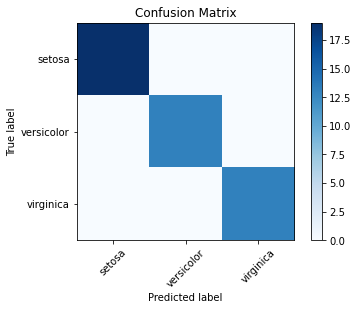

In [17]:
# Data Visualization
# Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

**Data Visualization** - Confusion Matrix: We use matplotlib to create a heatmap to visualize the confusion matrix. The heatmap's intensity represents the number of correct and incorrect predictions for each class. The color bar indicates the scale of the values.

### 2.10 Classification Report:

In [18]:
# Classification Report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



**Classification Report**: We print the classification report, which includes metrics like precision, recall, F1-score, and support for each class.

### 2.11 Data Visualization - ROC Curves

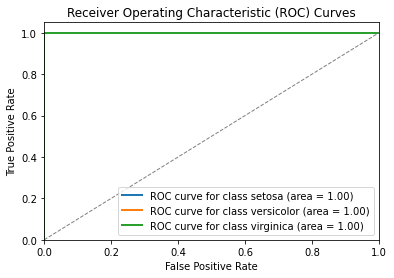

In [19]:
# ROC Curves for each class
plt.figure(figsize=(6, 4))
for i in range(len(iris.target_names)):
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc = roc_auc_score(y_test == i, y_probs[:, i])
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:.2f})'.format(iris.target_names[i], roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()


**Data Visualization - ROC Curves**: Finally, we create a line plot for the ROC curves of each class using matplotlib. The ROC curves plot the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds for each class. The area under each curve (ROC-AUC) quantifies the model's performance in distinguishing each class from the rest. We add the ROC-AUC value as a label to the curves and display the plot with a legend.